In [263]:
## importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn.model_selection import GridSearchCV

In [264]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


GENERAL INFO ABOUT THE DATASET

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [265]:
# to describe the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## CREATING VISUAL PLOTS FOR THE GIVEN DATASET

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


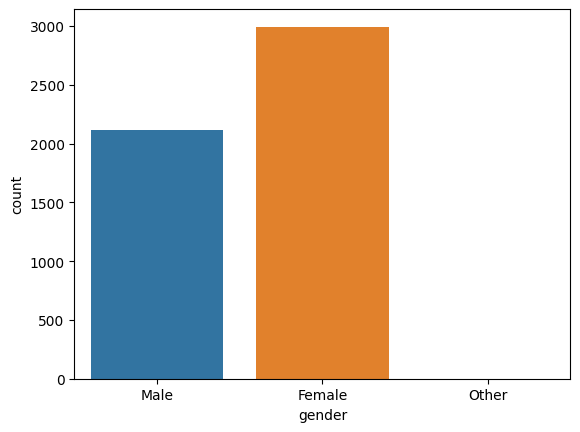

In [266]:
## creating the count plot for the gender column
print(df.gender.value_counts())
ax = sns.countplot(data=df, x="gender")
plt.show()

From the above graph we can interpret there are 2994 females and 2115 males thus number of females are more tha male

0    4612
1     498
Name: hypertension, dtype: int64


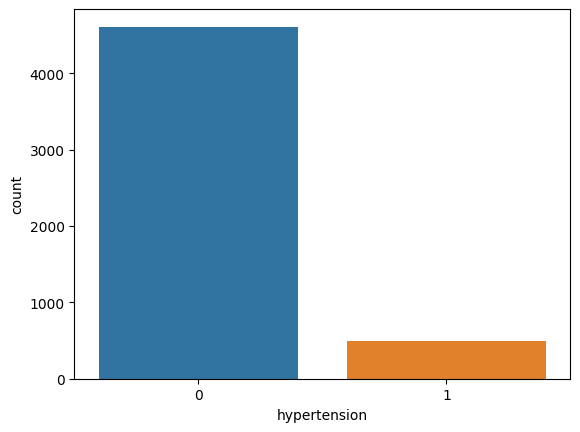

In [267]:
## creating the countplot of the people having either hypertension or not
print(df.hypertension.value_counts())
ax = sns.countplot(data=df, x="hypertension")
plt.show()

From the above graph we can interpret there less number of people who are suffering from hypertension.

0 represents the people who are not suffering from the hypertension
1 represents the people who are suffering from the hypertension

Yes    3353
No     1757
Name: ever_married, dtype: int64


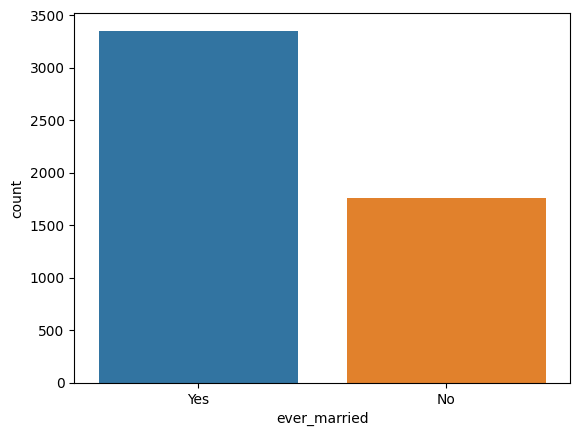

In [268]:
## creating the countplot for the marriage status of the people
print(df.ever_married.value_counts())
ax = sns.countplot(data=df, x="ever_married")
plt.show()

From the above graph we can infer that there more number of married people 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


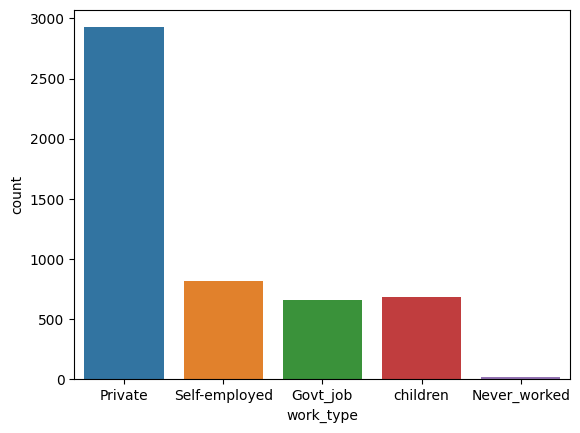

In [269]:
## to make the countplot about the work type of the people
print(df.work_type.value_counts())
ax = sns.countplot(data=df, x="work_type")
plt.show()

from the above graph we can infer that maximum people are working in the private sector

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


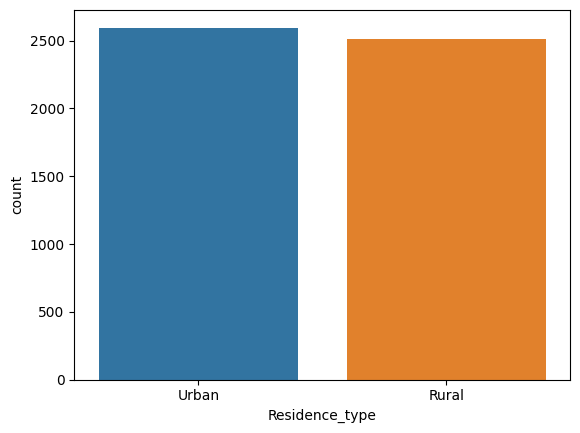

In [270]:
## making the countplot for the residence type of the people
print(df.Residence_type.value_counts())
ax = sns.countplot(data=df, x="Residence_type")
plt.show()

From the above graph we can infer that most people live in the Urban area as compared to the Rural area

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


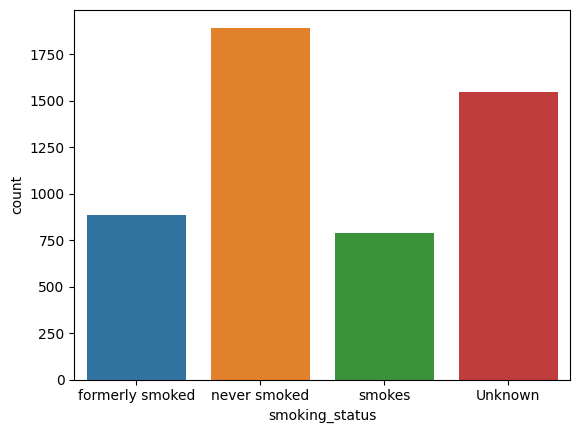

In [ ]:
## creating a countplot for the smoking status of the people 
print(df.smoking_status.value_counts())
ax = sns.countplot(data=df, x="smoking_status")
plt.show()

From the given graph we can observe there are lot of non smokers present but we can give a proper inference about the exact status of the Unknown.

0    4861
1     249
Name: stroke, dtype: int64


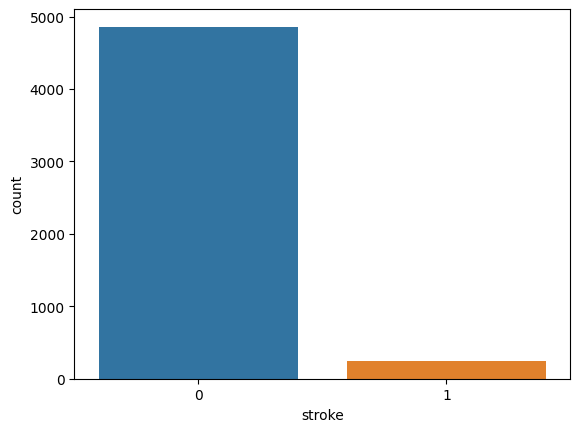

In [ ]:
## plotting a count plot of the occurence of stroke in people
print(df.stroke.value_counts())
ax = sns.countplot(data=df, x="stroke")
plt.show()

From the above graph we can infer that there are less number of people who have suffered from stroke.

<Figure size 1200x1000 with 0 Axes>

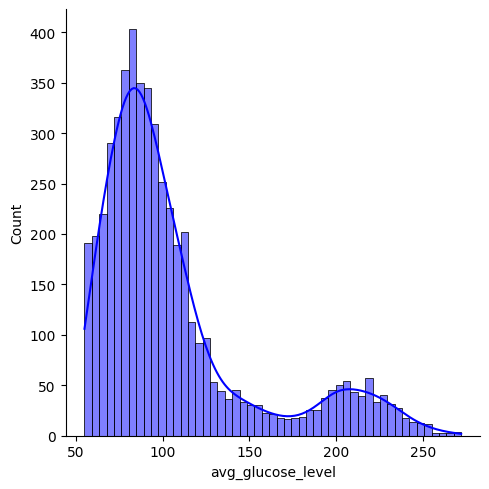

In [ ]:
## creating distribution plot for the average glucose level
fig = plt.figure(figsize=(12,10))
sns.displot(df.avg_glucose_level, color = 'blue', label = 'avg_glucose_level', kde = True)
plt.show()

From the above graph we can infer that large group of people have the glucose level between 50 and 100

<Figure size 5000x12000 with 0 Axes>

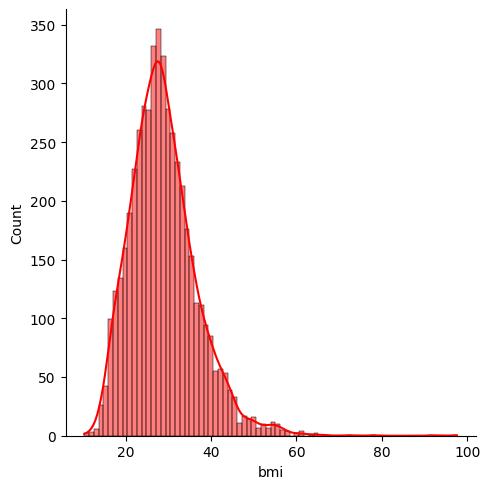

In [ ]:
## creating distribution plot for the BMI level
fig = plt.figure(figsize=(50,120))
sns.displot(df.bmi, color = 'red', label = 'bmi', kde = True)
plt.show()

d:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


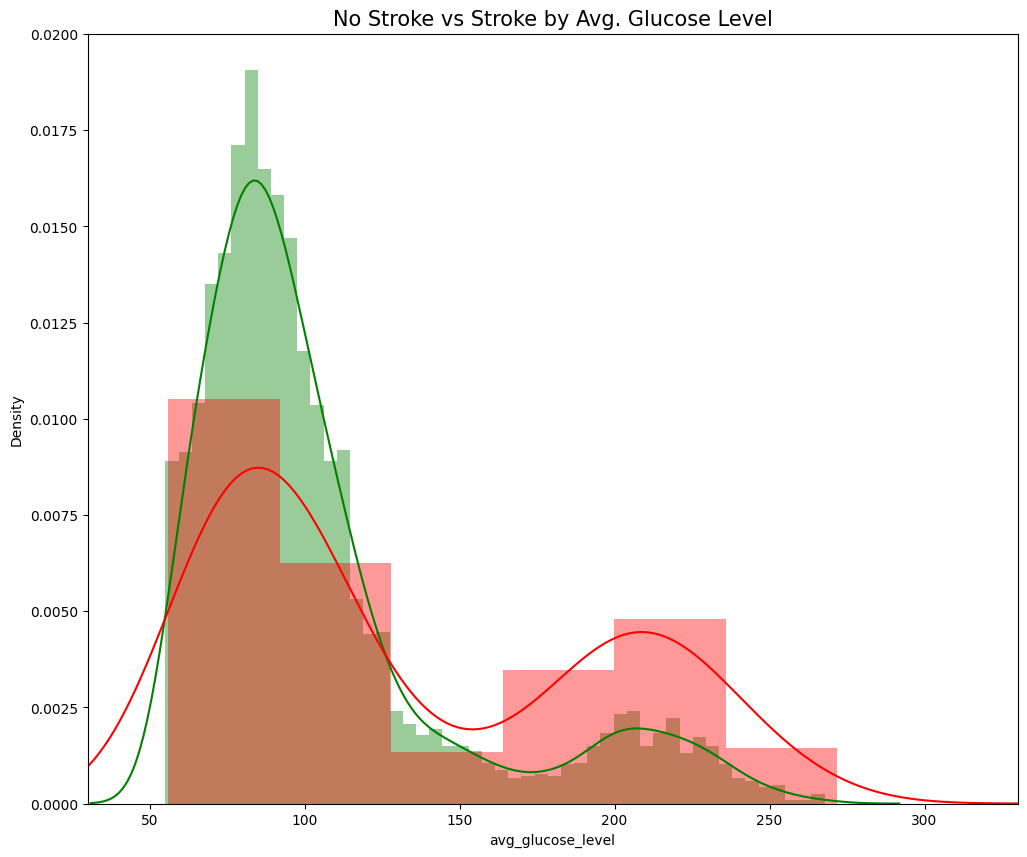

In [ ]:
## No Stroke vs Stroke by Avg. Glucose Level
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

From graph, we can infer that the density of people having glucose level less than 100 suffered stroke more.

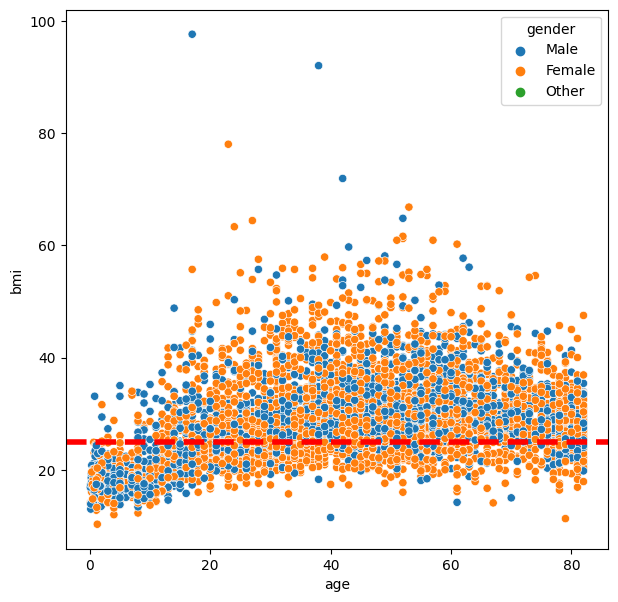

In [ ]:
## making the scatter plot for the Age vs BMI 
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

From above plot, we can observe that there are lot of people having BMI above 25 are overweight and obese.

# Data preprocessing

In [ ]:
# As some of the attributes are object(CategoricalData) we will convert it into numeric format
gender = {'Male': 1,'Female': 2,'Other': 3}
df.gender = [gender[item] for item in df.gender]

marriage = {'Yes': 1,'No': 2}
df.ever_married = [marriage[item] for item in df.ever_married]

work = {'Private': 1,'Self-employed': 2,'Govt_job': 3, 'children': 4, 'Never_worked': 5}
df.work_type = [work[item] for item in df.work_type]

residence = {'Urban': 1,'Rural': 2}
df.Residence_type = [residence[item] for item in df.Residence_type]

smoking = {'smokes': 1,'never smoked': 2,'formerly smoked': 3,'Unknown': 4}
df.smoking_status = [smoking[item] for item in df.smoking_status]



In [ ]:
#checking if there are any null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#As there are multiple NULL VALUES, we need to fill it with different values such as mean, etc 

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())



In [ ]:
#checking if there are any null values (Removed)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# We will drop useless columns for example id
df=df.drop(df.columns[[0]], axis = 1)


<AxesSubplot:>

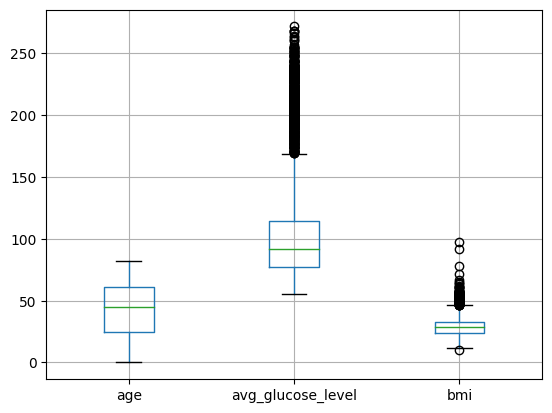

In [ ]:
df.boxplot(column=['age', 'avg_glucose_level', 'bmi'])

As we can see a huge number of outliers in the Glucose level and bmi column, we wont be deleting it, because
as these are patient records, who might be unhealthy, they will be having these stats deviated from the 
average healthy person

# Preparing the data for ML techniques


In [ ]:
X = df.iloc[:, 0:10]
y = df.iloc[:, 10:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)


y_train = np.array(y_train)
y_train = y_train.reshape(-1)


y_test = np.array(y_test)
y_test = y_test.reshape(-1)

In [ ]:
# KNN
kn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
kn.fit(X_train, y_train)
predictionKN = kn.predict(X_test)
score = acs(y_test, predictionKN)
print("KNeighborsClassifier: %.2f%%" % (score * 100.0))


# Training and testing set from Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictionDT = dt.predict(X_test)
score = acs(y_test, predictionDT)
print("DecisionTreeClassifier: %.2f%%" % (score * 100.0))


# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
predictionNB = nb.predict(X_test)
score = acs(y_test, predictionNB)
print("GaussianNB: %.2f%%" % (score * 100.0))


# Logistic regression
para=[{'max_iter':[1500,2500,3500,4500]}]

lr = GridSearchCV(LogisticRegression(), param_grid=para, cv=5, scoring='r2')
lr.fit(X_train, y_train)
predictionLR = lr.predict(X_test)
score = acs(y_test, predictionLR)
print("LogisticRegression: %.2f%%" % (score * 100.0))

# Random forest
rfc = RandomForestClassifier(n_estimators=50, max_depth=15)
rfc.fit(X_train, y_train)
predictionRFC = rfc.predict(X_test)
score = acs(y_test, predictionRFC)
print("RandomForestClassifier: %.2f%%" % (score * 100.0))


KNeighborsClassifier: 94.13%
DecisionTreeClassifier: 91.59%
GaussianNB: 87.87%
LogisticRegression: 94.72%
RandomForestClassifier: 94.72%


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = acs(y_test, predictions)
print("xgboost: %.2f%%" % (accuracy * 100.0))

# Hyperparameter tuning


In [276]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 560, 920, 1280, 1640, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, 70, 90, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [277]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=15,
                                                    n_estimators=50),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30, 50, 70, 90, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 560, 920, 1280,
                                                         1640, 2000]},
                   random_state=42, verbose=2)

In [278]:
predictionRF = rf_random.predict(X_test)
score = acs(y_test, predictionRF)
print("RandomForestClassifier: %.2f%%" % (score * 100.0))

RandomForestClassifier: 94.72%


Even when bosting the highest accuracy giving algorithm, there was no such difference in accuracy

# Ensemble Learning

In [279]:
def ensemble(X):
    predictionKN = kn.predict(X)
    predictionDT = dt.predict(X)
    predictionNB = nb.predict(X)
    predictionLR = lr.predict(X)
    predictionRFC = rfc.predict(X)

    ensemble_prediction = np.zeros(len(predictionDT))
    for i in range(len(predictionDT)):
        ensemble_prediction[i] = predictionDT[i]+predictionKN[i] + predictionNB[i]+predictionLR[i]+predictionRFC[i]

    for j in range(len(predictionDT)):
        if ensemble_prediction[j] >= 4:
            ensemble_prediction[j] = 1
        else:
            ensemble_prediction[j] = 0
    return ensemble_prediction


    
ensemble_prediction=ensemble(X_test)
score = acs(y_test, ensemble_prediction)
print("Ensemble Learning: %.2f%%" % (score * 100.0))

Ensemble Learning: 94.72%
